# Importar Principais Bibliotecas

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import datasets

import numpy as np
import matplotlib.pyplot as plt

# Remover Imagens com formatos diferentes

In [2]:
#Inicio
import os
import cv2
import imghdr

In [3]:
directorio = 'data' 

In [4]:
#Todas as imagens do dataSet estao no formato "png"
extensao_img = ['png']

In [5]:
#Verficar se cada uma das imagens esta no formato "png", caso nao sera removida
for imagens in os.listdir(directorio): 
    for final_img in os.listdir(os.path.join(directorio, imagens)):
        caminho_img = os.path.join(directorio, imagens, final_img)
        img = cv2.imread(caminho_img)
        #Salvar a extensao da imagem em tipo
        tipo = imghdr.what(caminho_img)
        if tipo not in extensao_img: 
            print('Image is not png extension {}'.format(caminho_img))
            os.remove(caminho_img)

# Carregar os dados

In [6]:
import numpy as np
from matplotlib import pyplot as plt

In [7]:
#Estabelecer o conjunto de dados(sem os rotulos que serao criados posteriormente)
data = tf.keras.utils.image_dataset_from_directory('data')

Found 601 files belonging to 4 classes.


In [8]:
#Garantir o acesso ao pipiline dos dados
data_count = data.as_numpy_iterator()

In [9]:
#batch e composto pelas imagens e rotulos
batch = data_count.next()

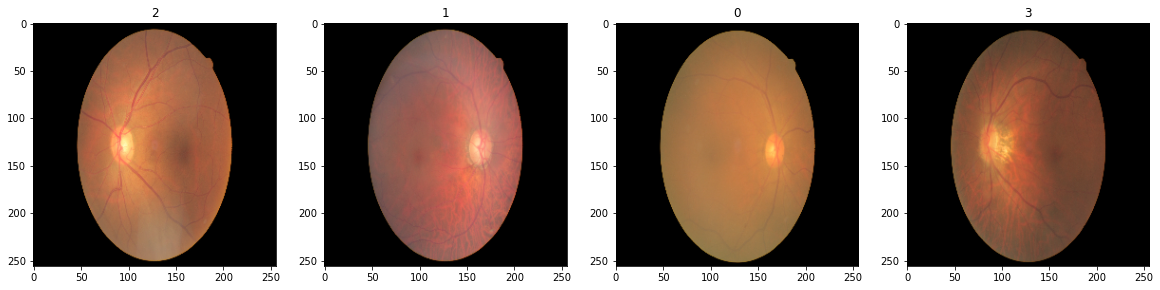

In [10]:
#Batches(normal, cataracta, glaucoma, retina)

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for index, img in enumerate(batch[0][:4]):
    ax[index].imshow(img.astype(int))
    ax[index].title.set_text(batch[1][index])

In [11]:
#Fim

# Pre processamento dos dados

Dividing our pixels images values by the maximium scale to be between 0 and 1 instead of 0 to 255, it will improve the model performance in time of train

x - imagens

y - labels(target variables)

In [12]:
data = data.map(lambda x,y: (x/255, y))

In [13]:
#pick up the first batch in the dataset
data.as_numpy_iterator().next()

(array([[[[0.0000000e+00, 4.9019611e-04, 4.9019611e-04],
          [1.5625000e-03, 1.2254902e-03, 1.2254902e-03],
          [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
          ...,
          [0.0000000e+00, 3.5232843e-03, 3.4313726e-03],
          [3.3700981e-04, 3.3700981e-04, 3.3700981e-04],
          [0.0000000e+00, 2.7573531e-04, 2.7573531e-04]],
 
         [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
          [0.0000000e+00, 2.4509805e-03, 1.6850490e-03],
          [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
          ...,
          [0.0000000e+00, 2.7267158e-03, 2.4509805e-03],
          [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
          [0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],
 
         [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
          [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
          [1.4705883e-03, 2.7573531e-04, 2.7573531e-04],
          ...,
          [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
          [0.0000000e+00, 0.0000000e+

# Data into Train, Test and Validation

In [14]:
#Dividing the data into: 70% for train, 20% for validation, and 10% for test
train_size = int(len(data)*0.7)
val_size = int(len(data)*0.2)
test_size = int(len(data)*0.1)

In [15]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Build The Classification Model

In [16]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [18]:
#Choose sequencial its easy when we have got one data input an one data output
model = Sequential()

In [19]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [20]:
#Will use 'adam' optimizer, and accuracy as measurer to see how the model performs
#model.compile('adam', loss=tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])
from keras.losses import SparseCategoricalCrossentropy
model.compile(optimizer='adam', loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# Train the model

In [22]:
logdir='logs'

In [23]:
#Saving the model in this checkpoint
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [24]:
#Take in the training data and validate with the validation data
#Store the training process in the variable history
history = model.fit(train, epochs=40, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/40
13/13 [==============================] - 30s 2s/step - loss: 1.3071 - accuracy: 0.4712 - val_loss: 1.2790 - val_accuracy: 0.5104
Epoch 2/40
13/13 [==============================] - 30s 2s/step - loss: 1.2634 - accuracy: 0.5096 - val_loss: 1.2981 - val_accuracy: 0.5208
Epoch 3/40
13/13 [==============================] - 32s 2s/step - loss: 1.2789 - accuracy: 0.4832 - val_loss: 1.2227 - val_accuracy: 0.5104
Epoch 4/40
13/13 [==============================] - 29s 2s/step - loss: 1.2267 - accuracy: 0.4952 - val_loss: 1.1549 - val_accuracy: 0.5729
Epoch 5/40
13/13 [==============================] - 31s 2s/step - loss: 1.1918 - accuracy: 0.5168 - val_loss: 1.2417 - val_accuracy: 0.4583
Epoch 6/40
13/13 [==============================] - 32s 2s/step - loss: 1.1297 - accuracy: 0.5577 - val_loss: 1.1442 - val_accuracy: 0.5521
Epoch 7/40
13/13 [==============================] - 30s 2s/step - loss: 1.0895 - accuracy: 0.5745 - val_loss: 1.2814 - val_accuracy: 0.5208
Epoch 8/40
13/13 [==